In [1]:
import numpy as np
import cv2
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
cap = cv2.VideoCapture("data/sample_lol.mkv")

In [5]:
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
length

5606

In [9]:
# extract frames

if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed

count = 0
while(cap.isOpened()):
  
  ret, frame = cap.read()
  if ret:
    if count % 10 == 0:
        print(f"Saving frame {count} ...")
        cv2.imwrite(f"data/imgs_lol/sample_{count}.jpeg", frame)
    count += 1

  else:
    break

cap.release()

Saving frame 0 ...
Saving frame 10 ...
Saving frame 20 ...
Saving frame 30 ...
Saving frame 40 ...
Saving frame 50 ...
Saving frame 60 ...
Saving frame 70 ...
Saving frame 80 ...
Saving frame 90 ...
Saving frame 100 ...
Saving frame 110 ...
Saving frame 120 ...
Saving frame 130 ...
Saving frame 140 ...
Saving frame 150 ...
Saving frame 160 ...
Saving frame 170 ...
Saving frame 180 ...
Saving frame 190 ...
Saving frame 200 ...
Saving frame 210 ...
Saving frame 220 ...
Saving frame 230 ...
Saving frame 240 ...
Saving frame 250 ...
Saving frame 260 ...
Saving frame 270 ...
Saving frame 280 ...
Saving frame 290 ...
Saving frame 300 ...
Saving frame 310 ...
Saving frame 320 ...
Saving frame 330 ...
Saving frame 340 ...
Saving frame 350 ...
Saving frame 360 ...
Saving frame 370 ...
Saving frame 380 ...
Saving frame 390 ...
Saving frame 400 ...
Saving frame 410 ...
Saving frame 420 ...
Saving frame 430 ...
Saving frame 440 ...
Saving frame 450 ...
Saving frame 460 ...
Saving frame 470 ...
Sav

In [1]:
from src.matching.loc import find_in_frame

In [2]:
import cv2
import matplotlib.pyplot as plt

(511, 512, 3)

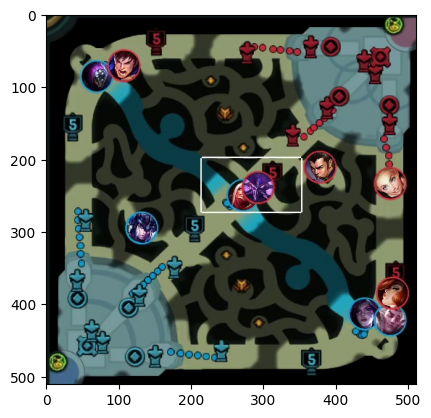

In [16]:
img = cv2.imread("data/imgs_lol/minimap_custom_0.jpeg")
plt.imshow(img[:, :, (2, 1, 0)])
img.shape

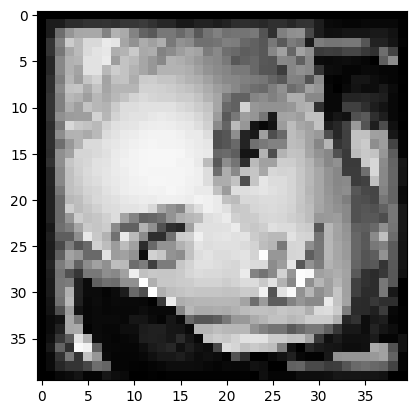

In [25]:
img = cv2.imread("data/assets/league_of_legends/lux.png", cv2.IMREAD_GRAYSCALE)
img_resize = cv2.resize(img, (40, 40))
plt.imshow(img_resize, cmap="gray")

In [27]:
top_left, bottom_right = find_in_frame("data/imgs_lol/minimap_custom_0.jpeg", img_resize)

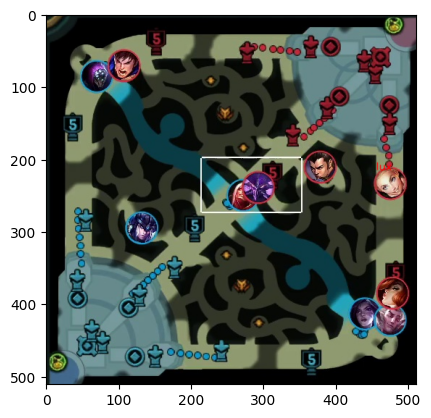

In [28]:
img = cv2.imread("data/imgs_lol/minimap_custom_0.jpeg")

img = cv2.putText(img, "lux", top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5,  
                 (0, 0, 255) , 1, cv2.LINE_AA, False) 

plt.imshow(img[:, :, (2, 1, 0)])
plt.show()

In [62]:
img = cv2.imread("data/imgs_lol/minimap_custom_0.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 32,
 param1=100, param2=30,
 minRadius=18, maxRadius=25)
 

In [63]:
circles

array([[[377.5, 211.5,  23.3],
        [ 69.5,  85.5,  21.1],
        [476.5, 234.5,  21. ],
        [131.5, 294.5,  20.8],
        [107.5,  71.5,  21.1],
        [477.5, 386.5,  22.2],
        [439.5, 413.5,  21. ],
        [272.5, 250.5,  24.4],
        [293.5, 240.5,  21.1],
        [474.5, 421.5,  21. ]]], dtype=float32)

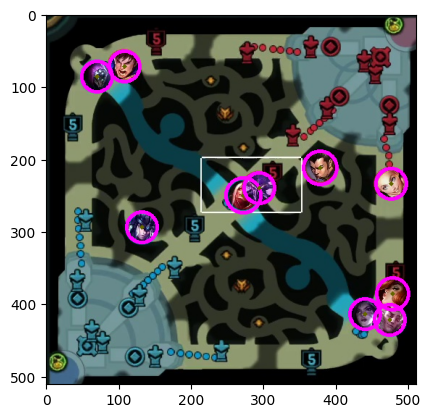

In [55]:
import numpy as np
import matplotlib.pyplot as plt

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(img, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (255, 0, 255), 3)
 
plt.imshow(img[:, :, (2, 1, 0)])

In [68]:
circles.shape

(1, 10, 3)

In [101]:
import math
math.ceil(circles[:, :, -1].mean())

22

(440, 414) 21
(42, 42, 3)


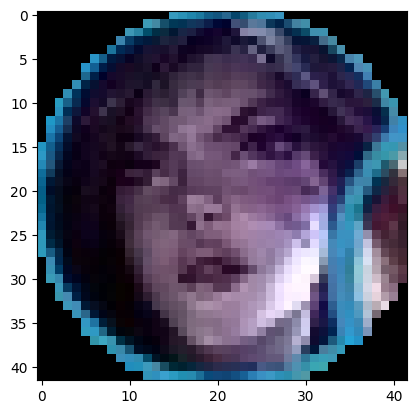

In [82]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    first_circle = circles[0, 6]
    first_center = (first_circle[0], first_circle[1])
    first_radius = first_circle[2] 

    print(first_center, first_radius)
    mask = np.zeros_like(img)
    mask = cv2.circle(mask, first_center, first_radius + 1, (255,255,255), -1)
    
    result = cv2.bitwise_and(img, mask)
    crop = result[first_center[1] - first_radius:first_center[1] + first_radius,
               first_center[0] - first_radius:first_center[0] + first_radius, :]

print(crop.shape)
plt.imshow(crop[:, :, (2, 1, 0)])

In [86]:
def create_circle_icon(path, resize=None):
    img = cv2.imread(path)
    hh, ww = img.shape[:2]
    hh2 = hh // 2
    ww2 = ww // 2

    # define circles
    radius = hh2
    yc = hh2
    xc = ww2

    # draw filled circle in white on black background as mask
    mask = np.zeros_like(img)
    mask = cv2.circle(mask, (xc,yc), radius, (255,255,255), -1)

    # apply mask to image
    result = cv2.bitwise_and(img, mask)
    if resize is not None:
        result = cv2.resize(result, dsize=resize)

    return result

In [122]:
def MSE(img1, img2):
    squared_diff = (img1 -img2) ** 2
    summed = np.sum(squared_diff)
    num_pix = img1.shape[0] * img1.shape[1] #img1 and 2 should have same shape
    err = summed / num_pix
    return err

In [106]:
# get all images

average_radius = math.ceil(circles[:, :, -1].mean()) * 2
red_team = ["garen", "xin_zhao", "kassadin", "miss_fortune", "lux"]
blue_team = ["jax", "sejuani", "vladimir", "kaisa", "rakan"]

blue_team_icons = {}
for blue_champ in blue_team:
    blue_team_icons[blue_champ] = create_circle_icon(f"data/assets/league_of_legends/{blue_champ}.png", resize=(average_radius, average_radius))

red_team_icons = {}
for red_champ in red_team:
    red_team_icons[red_champ] = create_circle_icon(f"data/assets/league_of_legends/{red_champ}.png", resize=(average_radius, average_radius))

In [118]:
blue_team_icons["kaisa"].dtype

dtype('uint8')

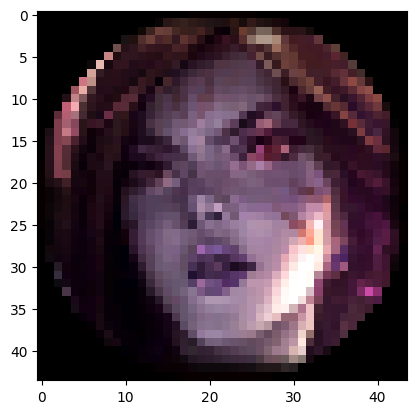

In [113]:
plt.imshow(blue_team_icons["kaisa"])

In [117]:
resized_crop = cv2.resize(crop, (average_radius, average_radius))
resized_crop.dtype

dtype('uint8')

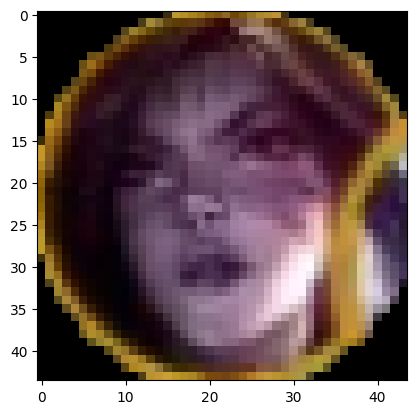

In [123]:
plt.imshow(resized_crop)

In [127]:
for k, v in red_team_icons.items():
    print(k)
    print(MSE(resized_crop, v))

garen
265.0599173553719
xin_zhao
271.8264462809917
kassadin
265.6709710743802
miss_fortune
268.11570247933884
lux
273.31714876033055
jax
253.88997933884298
sejuani
269.05320247933884
vladimir
267.9261363636364
kaisa
212.05630165289256
rakan
275.5139462809917


In [126]:
all_champs = red_team_icons | blue_team_icons

In [138]:
img = cv2.imread("data/imgs_lol/minimap_custom_0.jpeg")

dists = []
if circles is not None:
    circles = np.uint16(np.around(circles))
    
    average_radius = math.ceil(circles[:, :, -1].mean()) * 2
    
    for i in circles[0, :]:
        center = (i[0], i[1])
        radius = i[2] 

        mask = np.zeros_like(img)
        mask = cv2.circle(mask, center, radius + 1, (255,255,255), -1)
        
        result = cv2.bitwise_and(img, mask)
        crop = result[center[1] - radius:center[1] + radius,
                center[0] - radius:center[0] + radius, :]

        resized_crop = cv2.resize(crop, (average_radius, average_radius))

        current_dist = []
        for k, v in all_champs.items():
            current_dist.append(MSE(resized_crop, v))
        
        dists.append(current_dist)

In [139]:
dists

[[262.8584710743802,
  226.74070247933884,
  262.74121900826447,
  265.18285123966945,
  265.4638429752066,
  266.86311983471074,
  263.8879132231405,
  263.5738636363636,
  267.37448347107437,
  267.04287190082647],
 [266.4220041322314,
  266.66064049586777,
  268.0309917355372,
  270.2432851239669,
  270.6038223140496,
  198.6404958677686,
  267.52685950413223,
  268.93698347107437,
  251.76342975206612,
  270.00619834710744],
 [270.827479338843,
  272.198347107438,
  270.4096074380165,
  270.6219008264463,
  226.79235537190084,
  271.2370867768595,
  270.65754132231405,
  267.1275826446281,
  268.0552685950413,
  277.2164256198347],
 [269.9452479338843,
  263.03512396694214,
  272.264979338843,
  273.43388429752065,
  270.1900826446281,
  267.0986570247934,
  236.1172520661157,
  267.6668388429752,
  263.0934917355372,
  270.2990702479339],
 [233.60485537190084,
  266.65237603305786,
  269.73037190082647,
  264.08006198347107,
  269.56043388429754,
  265.3615702479339,
  270.9814049

In [140]:
import scipy

In [141]:
result = scipy.optimize.linear_sum_assignment(dists)

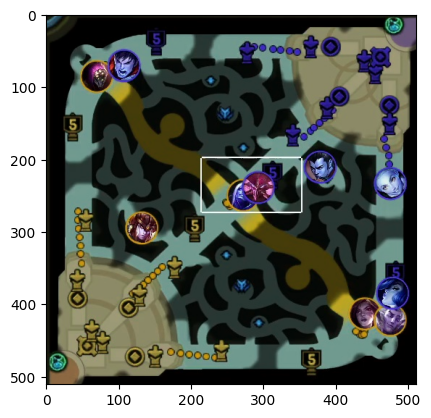

In [156]:
plt.imshow(img)

In [159]:
for row, col in zip(result[0], result[1]):
    
    current_circle = circles[0, col, :]
    print(current_circle)
        
    champ_name = list(all_champs.keys())[row]
    print(champ_name)
    img = cv2.putText(img, champ_name, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5,  
        (255, 0, 0) , 1, cv2.LINE_AA, False)  

[70 86 21]
garen
[478 386  22]
xin_zhao
[108  72  21]
kassadin
[440 414  21]
miss_fortune
[378 212  23]
lux
[132 294  21]
jax
[294 240  21]
sejuani
[272 250  24]
vladimir
[476 234  21]
kaisa
[474 422  21]
rakan


In [ ]:
top_left, bottom_right = find_in_frame("data/imgs_lol/minimap_custom_0.jpeg", img_resize)

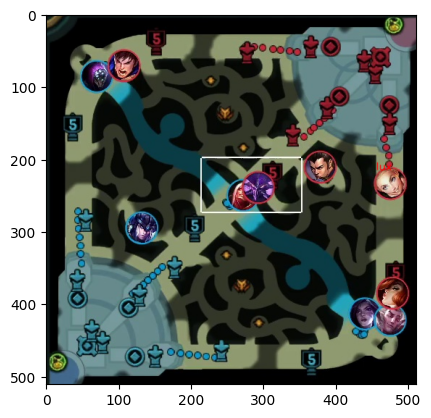

In [ ]:
img = cv2.imread("data/imgs_lol/minimap_custom_0.jpeg")

img = cv2.putText(img, "lux", top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5,  
                 (0, 0, 255) , 1, cv2.LINE_AA, False) 

plt.imshow(img[:, :, (2, 1, 0)])
plt.show()

In [152]:
circles
for row, col in zip(result[0], result[1]):
    print(circles[0, col, :])

[70 86 21]
[478 386  22]
[108  72  21]
[440 414  21]
[378 212  23]
[132 294  21]
[294 240  21]
[272 250  24]
[476 234  21]
[474 422  21]


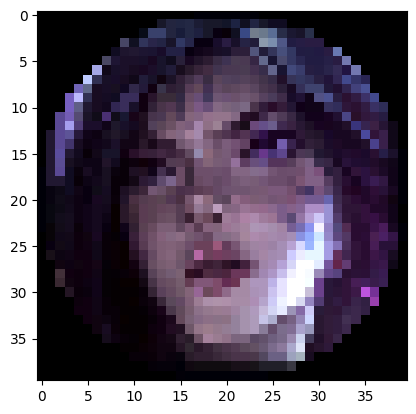

In [84]:
img = cv2.imread("data/assets/league_of_legends/kaisa.png")
hh, ww = img.shape[:2]
hh2 = hh // 2
ww2 = ww // 2

# define circles
radius = hh2
yc = hh2
xc = ww2

# draw filled circle in white on black background as mask
mask = np.zeros_like(img)
mask = cv2.circle(mask, (xc,yc), radius, (255,255,255), -1)

# apply mask to image
result = cv2.bitwise_and(img, mask)
result = cv2.resize(result, dsize=(40, 40))

plt.imshow(result[:, :, (2, 1, 0)])